$$ \Large \underline
{\textbf{Problema 1}}
$$

Determine los desplazamientos de los bordes libres y los esfuerzos en función de la posición para la
placa empotrada mostrada en la figura. Tome las dos particiones en elementos mostradas debajo y
compare los resultados. Asuma que E = 30 x 10e6
 psi y n = 0.30.

<center><img src="ImgProb01bG03.png"></center>

In [1]:
import gmsh
import numpy as np
import matplotlib.pyplot as plt
import MEF as mef

In [2]:
gmsh.initialize()

In [3]:
gmsh.model.add('test_01')

In [4]:
L = 20  # in
lc = 1
h = 10  # in
v = 0.3  # coef Poisson
Ei = 30e6  # psi
t = 1  # in

In [5]:
p1 = gmsh.model.geo.addPoint(0,0,0,lc/10)
p2 = gmsh.model.geo.addPoint(L,0,0,lc)
p3 = gmsh.model.geo.addPoint(L,h,0,lc)
p4 = gmsh.model.geo.addPoint(0,h,0,lc/10)

In [6]:
l1 = gmsh.model.geo.addLine(p1,p2)
l2 = gmsh.model.geo.addLine(p2,p3)
l3 = gmsh.model.geo.addLine(p3,p4)
l4 = gmsh.model.geo.addLine(p4,p1)

In [7]:
C1 = gmsh.model.geo.addCurveLoop([l1,l2,l3,l4])

In [8]:
S1 = gmsh.model.geo.addPlaneSurface([C1])

In [9]:
gmsh.model.geo.synchronize()

Ya están todos los elementos geométricos. 

In [10]:
Empotrado = gmsh.model.addPhysicalGroup(1, [l4])
gmsh.model.setPhysicalName(1,Empotrado,'Empotrado')

In [11]:
Traccionado = gmsh.model.addPhysicalGroup(1,[l2])
gmsh.model.setPhysicalName(1,Traccionado,'Traccionado')

In [12]:
Superficie = gmsh.model.addPhysicalGroup(2,[S1])
gmsh.model.setPhysicalName(2,Superficie,'Superficie')

Realizo el mallado

In [13]:
gmsh.model.mesh.generate(2)  # Se genera el mallado con dimension 2. Mallado por Volronoi

In [14]:
gmsh.model.geo.synchronize()
gmsh.fltk.run()

In [15]:
NodeInfo = gmsh.model.mesh.get_nodes()

In [16]:
NumeroNodos = NodeInfo[0].shape[0]

In [17]:
MN = NodeInfo[1].reshape(NumeroNodos,3)

In [18]:
ETAGS, ELEMENTS = gmsh.model.mesh.get_elements_by_type(2)

In [19]:
MC = ELEMENTS.reshape(ETAGS.shape[0],3)

In [20]:
gmsh.option.setNumber("Mesh.MshFileVersion",2.2)
gmsh.write('test.msh')

In [21]:
glxn = 2
dimension_elementos = 2

In [22]:
Ne, Nnxe = MC.shape
Nn = MN.shape[0]

In [23]:
E = np.zeros(Ne)
for e in range(Ne):
    E[e] = Ei

In [24]:
MC = MC - np.ones([Ne,Nnxe])  # resto 1 para acomodar a lenguaje python

In [25]:
K, Ke, D, B = mef.Kglobal_barra(MN, MC, E, glxn, dimension_elementos, v,t) 

In [26]:
s = np.array([0,1,6,7])
r = mef.vector_complemento(s, MN, glxn)

In [27]:
r

array([   2,    3,    4, ..., 5231, 5232, 5233])

In [28]:
Us = np.array([0,0,0,0]).reshape([-1,1])
Fr = np.array([5000,0,5000,0]).reshape([-1,1])  # lb
Fr = np.concatenate([Fr,np.zeros(len(r)-4).reshape([-1,1])])

In [29]:
F, U = mef.solve(K, r, s, Us, Fr)

In [30]:
sig = {}
d = {}
for e in range(Ne):
    nodo = MC[e,:].astype(int)
    d[e] = np.array([U[nodo[0]*glxn],U[nodo[0]*glxn+1],
                     U[nodo[1]*glxn],U[nodo[1]*glxn+1],
                     U[nodo[2]*glxn],U[nodo[2]*glxn+1]]).reshape([-1,1])
    sig[e] = D[e].dot(B[e].dot(d[e]))

In [31]:
np.set_printoptions(formatter={"float": lambda x: "%0.5f"% (x)})
print('\033[4m'+f'\nTensiones en x, y, xy de cada barra'+'\033[0m'+' [psi]:')
for e in range(Ne):
    print('\033[93m'+f'Elemento {e+1}:\n {sig[e]}'+'\033[0m')


Tensiones en x, y, xy de cada barra [psi]:
Elemento 1:
 [[50.86755]
 [-70.80295]
 [145.83134]]
Elemento 2:
 [[449.50410]
 [698.33119]
 [503.42634]]
Elemento 3:
 [[736.14209]
 [906.57269]
 [-818.83550]]
Elemento 4:
 [[988.12371]
 [114.07531]
 [55.63729]]
Elemento 5:
 [[999.79998]
 [7.04294]
 [-13.81492]]
Elemento 6:
 [[834.65852]
 [1815.98671]
 [1329.98927]]
Elemento 7:
 [[28.71018]
 [207.15623]
 [-82.07867]]
Elemento 8:
 [[1008.55026]
 [8.48195]
 [-9.69280]]
Elemento 9:
 [[859.00772]
 [319.51303]
 [52.36735]]
Elemento 10:
 [[35.57534]
 [359.75622]
 [-118.02467]]
Elemento 11:
 [[194.09304]
 [545.19463]
 [149.40756]]
Elemento 12:
 [[897.70994]
 [1078.78989]
 [1002.26382]]
Elemento 13:
 [[570.19019]
 [558.24096]
 [195.31995]]
Elemento 14:
 [[1404.19432]
 [70.47739]
 [-367.34785]]
Elemento 15:
 [[1600.92965]
 [217.04868]
 [-574.96902]]
Elemento 16:
 [[470.31826]
 [642.39384]
 [-413.75559]]
Elemento 17:
 [[916.37460]
 [189.57239]
 [-44.02316]]
Elemento 18:
 [[241.16838]
 [1109.17588]
 [-54

In [32]:
U2D = U.reshape(Nn,glxn)
U3D = np.append(U2D,np.zeros(U2D.shape[0]).reshape([-1,1]),1)
print('\n\033[4m'+f'Desplazamientos x, y, e z de cada nodo'+'\033[0m'+' [in x 10^6]:')
for n in range(Nn):
    print('\033[93m'+f'Nodo {n+1}: {U3D[n]*1e6}'+'\033[0m')


Desplazamientos x, y, e z de cada nodo [in x 10^6]:
Nodo 1: [0.00000 0.00000 0.00000]
Nodo 2: [2300.87544 413.73887 0.00000]
Nodo 3: [2347.04762 -446.99823 0.00000]
Nodo 4: [0.00000 0.00000 0.00000]
Nodo 5: [272.69795 -9.37117 0.00000]
Nodo 6: [416.26046 -34.11946 0.00000]
Nodo 7: [510.08103 -43.09464 0.00000]
Nodo 8: [580.40089 -47.94798 0.00000]
Nodo 9: [636.43789 -51.79026 0.00000]
Nodo 10: [683.89827 -53.74768 0.00000]
Nodo 11: [724.68592 -54.26458 0.00000]
Nodo 12: [760.45555 -54.24859 0.00000]
Nodo 13: [792.68447 -53.44323 0.00000]
Nodo 14: [822.08942 -52.21790 0.00000]
Nodo 15: [849.20738 -50.54675 0.00000]
Nodo 16: [874.40732 -48.51164 0.00000]
Nodo 17: [898.05002 -45.99961 0.00000]
Nodo 18: [920.29014 -42.97650 0.00000]
Nodo 19: [941.27574 -39.83290 0.00000]
Nodo 20: [961.23823 -36.23899 0.00000]
Nodo 21: [980.27515 -32.52759 0.00000]
Nodo 22: [998.47563 -28.48546 0.00000]
Nodo 23: [1015.96736 -24.17380 0.00000]
Nodo 24: [1032.70644 -19.68717 0.00000]
Nodo 25: [1048.85423 -15

In [33]:
MNdef = MN + U3D*1e4

Text(0.5, 0, 'desplazamiento en x')

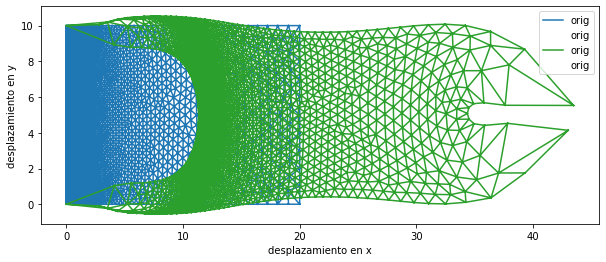

In [34]:
fig, ax = plt.subplots(figsize=(10,4))
plt.triplot(MN[:,0], MN[:,1], MC, label='orig')
plt.triplot(MNdef[:,0], MNdef[:,1], MC, label='orig')
plt.legend()
plt.ylabel('desplazamiento en y')
plt.xlabel('desplazamiento en x')